In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [227]:
train_data = pd.read_csv("train_data_processed.csv")
test_data = pd.read_csv("test_data_processed.csv")
train_data_red = pd.read_csv("red_train_data_processed.csv")
test_data_red = pd.read_csv("red_test_data_processed.csv")

In [228]:
train_data.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F29,F30,F31,F32,F33,F34,F35,F36,F37,Target
0,0.505128,-0.130344,0.000000,0.000000,0.648876,-0.178814,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
1,0.420931,-0.443230,0.047619,0.017241,0.643258,2.168447,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
2,-0.451105,-0.364441,0.000000,0.000000,0.640449,-0.126948,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
3,-0.798826,-0.291479,0.000000,0.000000,0.941011,-0.095372,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
4,-0.972686,-0.354863,0.047619,0.068966,0.646067,-0.077367,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1


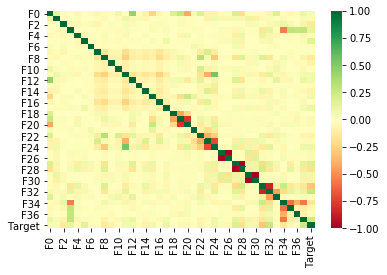

In [44]:
corrmat = train_data.corr()
g=sns.heatmap(corrmat,cmap="RdYlGn")

In [229]:
X = train_data.drop("Target",axis = 1)
y = train_data["Target"]
X_red = train_data_red.drop("Target",axis = 1)

In [230]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train_red ,X_test_red,y_train_red,y_test_red = train_test_split(X_red,y,test_size = 0.2)

In [48]:
y_train.value_counts()

1    1422
0    1059
Name: Target, dtype: int64

In [49]:
from imblearn.over_sampling import SMOTE

In [51]:
balancer= SMOTE()
train_X,train_y = balancer.fit_resample(X,y)

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [136]:
import pickle
name = []
accuracy = [] 
precision = [] 
recall = [] 
f1 = []

# Main function for models
def model(algorithm,x_train,y_train,x_test,y_test,name_): 
    algorithm.fit(x_train,y_train)
    predicts=algorithm.predict(x_test)
    prediction=pd.DataFrame(predicts)
    accuracy_=accuracy_score(y_test,prediction)
    precision_ = precision_score(y_test,prediction)
    recall_ = recall_score(y_test,prediction)
    f1_ = f1_score(y_test,prediction)
    # Appending results to Lists 
    name.append(name)
    accuracy.append(accuracy_)
    precision.append(precision_)
    recall.append(recall_)
    f1.append(f1_)
    
    # Printing results  
    print(algorithm,"\n") 
    print("Accuracy :",accuracy_)
    print("Precision:",precision_,)
    print("Recall:",recall_)
    print("F1 Score :",f1_)
    
    # Saving Result 
    file = open(name_+'.pkl', 'wb')
    pickle.dump(algorithm, file)
    file.close()
    
    

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [138]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
model(lr,X_train,y_train,X_test,y_test,"lr")

LogisticRegression(max_iter=1000) 

Accuracy : 0.6618357487922706
Precision: 0.6509433962264151
Recall: 0.8165680473372781
F1 Score : 0.7244094488188977


In [139]:
from sklearn.neighbors import KNeighborsClassifier
param = {"n_neighbors":[3,4,5,7,10,15],
         "weights":["uniform","distance"],
         "leaf_size":[10,20,30,40,50],
         "p":[1,2],
         "algorithm":["ball_tree","kd_tree"]
        }
knc = KNeighborsClassifier()
gridKN = GridSearchCV(knc,param_grid=param,cv = 3)
model(gridKN,X_train,y_train,X_test,y_test,"KNN Grids")

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [3, 4, 5, 7, 10, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']}) 

Accuracy : 0.7423510466988728
Precision: 0.778125
Recall: 0.7366863905325444
F1 Score : 0.7568389057750758


In [140]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
model(GNB,X_train,y_train,X_test,y_test,"Naive Bayes")

GaussianNB() 

Accuracy : 0.7697262479871175
Precision: 0.8679245283018868
Recall: 0.6804733727810651
F1 Score : 0.7628524046434495


In [141]:
from sklearn.linear_model import RidgeClassifier
param ={
    "alpha":[0.1,0.3,0.5,0.7,1,2,5,10],
    "solver" : ["svd","cholesky","lsqr","sparse_cg","sag","saga"]
}
rc = RidgeClassifier()
ridge_grid = GridSearchCV(rc,param_grid=param,cv = 3)

model(ridge_grid,X_train,y_train,X_test,y_test,"Ridge Classifier")

GridSearchCV(cv=3, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.7, 1, 2, 5, 10],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']}) 

Accuracy : 0.6650563607085346
Precision: 0.6533018867924528
Recall: 0.8195266272189349
F1 Score : 0.7270341207349081


In [145]:
from sklearn.svm import SVC
param ={
    "C" : [0.1,0.2,0.3,0.5,0.7,0.8,1,2,5,10,15,20,30],
    "kernel":["linear", "poly", "rbf", "sigmoid"],
    "degree": [1,2,3,4,5,7,10],
    "shrinking":[True,False],
    "probability":[True,False],
    "gamma":["scale","auto"]
}

svc = SVC()
svcgrid = RandomizedSearchCV(scv,param_distributions=param,cv=3,n_iter=300,n_jobs=-1)
model(svcgrid,X_train,y_train,X_test,y_test,"SVC")

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=300, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1,
                                              2, 5, 10, 15, 20, 30],
                                        'degree': [1, 2, 3, 4, 5, 7, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'probability': [True, False],
                                        'shrinking': [True, False]}) 

Accuracy : 0.7938808373590982
Precision: 0.8181818181818182
Recall: 0.7988165680473372
F1 Score : 0.8083832335329342


In [148]:
from sklearn.gaussian_process import GaussianProcessClassifier
GPC = GaussianProcessClassifier(max_iter_predict = 10000)
model(GPC,X_train,y_train,X_test,y_test,"gaussian process classifier")

GaussianProcessClassifier(max_iter_predict=10000) 

Accuracy : 0.7455716586151369
Precision: 0.78125
Recall: 0.7396449704142012
F1 Score : 0.7598784194528875


In [155]:
from sklearn.linear_model import PassiveAggressiveClassifier
param = {
    "C" : [0.1,0.2,0.3,0.5,0.7,0.8,1,1.5,2,3,5,7,10],
    "fit_intercept":[True,False],
    "validation_fraction" : [0.5,0.1,0.2,0.5,0.7],
    "loss" : ["hinge","squared_hinge"]
}
PAC = PassiveAggressiveClassifier()
PAC_grid = GridSearchCV(PAC,cv = 3,param_grid=param)
model(PAC_grid,X_train,y_train,X_test,y_test,"passive aggresive classifier")

GridSearchCV(cv=3, estimator=PassiveAggressiveClassifier(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1, 1.5, 2, 3, 5, 7,
                               10],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'validation_fraction': [0.5, 0.1, 0.2, 0.5, 0.7]}) 

Accuracy : 0.644122383252818
Precision: 0.7038327526132404
Recall: 0.5976331360946746
F1 Score : 0.6464


In [167]:
from sklearn.tree import DecisionTreeClassifier
grid_param = {
    "criterion":["gini","entropy"],
    "splitter" :["best","random"],
    "max_depth" : [x for x in range(10,1000,10)],
    "min_samples_split" :[2,3,4,5],
    "max_features" :["sqrt","log2",None]
}
DT = DecisionTreeClassifier()
DT_grid = RandomizedSearchCV(DT,param_distributions = grid_param ,cv = 3,n_iter=2000,n_jobs=-1)
model(DT_grid,X_train,y_train,X_test,y_test,"decision tree classifier")

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=2000,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, 210, 220,
                                                      230, 240, 250, 260, 270,
                                                      280, 290, 300, ...],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'splitter': ['best', 'random']}) 

Accuracy : 0.855072463768116
Precision: 0.8757575757575757
Recall: 0.8550295857988166
F1 Score : 0.8652694610778443


In [172]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(DT_grid.best_estimator_)
param_grid = {
    "n_estimators" : [x for x in range(20,150,10)],
    "learning_rate" : np.arange(0.1,1,0.1),
    "algorithm": ["SAMME", "SAMME.R"]
    
}
ABC_grid = GridSearchCV(ABC,param_grid=param_grid,cv = 3,n_jobs=-1)
model(ABC_grid,X_train,y_train,X_test,y_test,"AdaBoostClassifier")

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=510,
                                                                                min_samples_split=4)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100,
                                          110, 120, 130, 140]}) 

Accuracy : 0.9130434782608695
Precision: 0.9152046783625731
Recall: 0.9260355029585798
F1 Score : 0.9205882352941177


In [182]:
ABC_grid.best_score_

0.8919790407093914

In [176]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
param_grid = {
    "loss":["deviance", "exponential"],
    "learning_rate" : np.arange(0.1,1,0.1),
    "n_estimators" : np.arange(50,500,20),
    "criterion" : ["friedman_mse", "mse"],
    "min_samples_split" :[2,5,7,10,15,50],
    "min_samples_leaf":[ 1,2,5,8,10],
    "max_depth" : np.arange(3,50,2),
    "init" : ABC_grid.best_estimator_,
    "max_features" : [None, "sqrt", "log2"]
}
GBC_Random = RandomizedSearchCV(GBC,param_distributions=param_grid,n_iter= 100,cv = 3,n_jobs = -1,verbose=2)
model(GBC_Random,X_train,y_train,X_test,y_test,"GradientBoostingClassifier")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse'],
                                        'init': AdaBoostClassifier(algorithm='SAMME',
                                                                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                                         max_depth=510,
                                                                                                         min_samples_split=4),
                                                                   learning_rate=0.4,
                                                                   n_estimators=120),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0....
                                    

In [179]:
from sklearn.ensemble import RandomForestClassifier
random_grid = {
    "n_estimators" : np.arange(50,2000,30),
    "criterion" : ["gini", "entropy"],
    "max_depth" : np.append(np.array([None]),(np.arange(5,500,10))),
    "min_samples_split" : np.arange(1,30,2),
    "min_samples_leaf" :np.arange(1,30),
    "max_features" : ["sqrt","log2",None],
    "bootstrap" : [True,False]
}
RFC = RandomForestClassifier()
RFC_random  = RandomizedSearchCV(RFC,param_distributions=random_grid,n_jobs=-1,n_iter=2000,cv = 4,verbose = 2)
model(RFC_random,X_train,y_train,X_test,y_test,"RandomForestClassifier")


Fitting 4 folds for each of 2000 candidates, totalling 8000 fits
RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=2000,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([None, 5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135,
       145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255, 265,
       275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385, 395,
       405, 415, 425, 435, 445...
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                        'n_estimators': array([  50,   80,  110,  140,  170,  200,  230,  260,  290,  320,  350,
        380,  410,  440,  470,  500,  530,  560,  590,  620,  650,  680,
        710,  740,  770,  800,  830,  860,  890,  920,

In [181]:
from sklearn.ensemble import AdaBoostClassifier
ABC2 = AdaBoostClassifier(RFC_random.best_estimator_)
param_grid = {
    "n_estimators" : [x for x in range(20,150,10)],
    "learning_rate" : np.arange(0.1,1,0.1),
    "algorithm": ["SAMME", "SAMME.R"]    
}
ABC2_grid = GridSearchCV(ABC2,param_grid=param_grid,cv = 3,n_jobs=-1)
model(ABC2_grid,X_train,y_train,X_test,y_test,"AdaBoostClassifier2")

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                                                max_depth=95,
                                                                                max_features='log2',
                                                                                min_samples_split=5,
                                                                                n_estimators=1820)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100,
                                          110, 120, 130, 140]}) 

Accuracy : 0.893719806763285
Precision: 0.9
Recall: 0.9053254437869822
F1 Score : 0.9026548672566372


In [202]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model(lr,X_train_red,y_train_red,X_test_red,y_test_red,"lr")

LogisticRegression() 

Accuracy : 0.6457326892109501
Precision: 0.6709183673469388
Recall: 0.7429378531073446
F1 Score : 0.7050938337801609


In [203]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
model(GNB,X_train_red,y_train_red,X_test_red,y_test_red,"Naive Bayes")

GaussianNB() 

Accuracy : 0.7665056360708534
Precision: 0.8471760797342193
Recall: 0.7203389830508474
F1 Score : 0.7786259541984732


In [204]:
from sklearn.tree import DecisionTreeClassifier
grid_param = {
    "criterion":["gini","entropy"],
    "splitter" :["best","random"],
    "max_depth" : [x for x in range(10,1000,10)],
    "min_samples_split" :[2,3,4,5],
    "max_features" :["sqrt","log2",None]
}
DT = DecisionTreeClassifier()
DT_grid = RandomizedSearchCV(DT,param_distributions = grid_param ,cv = 3,n_iter=2000,n_jobs=-1)
model(DT_grid,X_train_red,y_train_red,X_test_red,y_test_red,"decision tree classifier_")

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=2000,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, 210, 220,
                                                      230, 240, 250, 260, 270,
                                                      280, 290, 300, ...],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'splitter': ['best', 'random']}) 

Accuracy : 0.8776167471819646
Precision: 0.8904494382022472
Recall: 0.8954802259887006
F1 Score : 0.8929577464788732


In [205]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(DT_grid.best_estimator_)
param_grid = {
    "n_estimators" : [x for x in range(20,150,10)],
    "learning_rate" : np.arange(0.1,1,0.1),
    "algorithm": ["SAMME", "SAMME.R"]
    
}
ABC_grid = GridSearchCV(ABC,param_grid=param_grid,cv = 3,n_jobs=-1)
model(ABC_grid,X_train_red,y_train_red,X_test_red,y_test_red,"AdaBoostClassifierred")

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=330,
                                                                                min_samples_split=4)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100,
                                          110, 120, 130, 140]}) 

Accuracy : 0.895330112721417
Precision: 0.9002770083102493
Recall: 0.9180790960451978
F1 Score : 0.9090909090909091


In [206]:
from sklearn.neural_network import MLPClassifier

In [208]:
from sklearn.neural_network import MLPClassifier
lf = MLPClassifier(max_iter=10000)
model(lf,X_train_red,y_train_red,X_test_red,y_test_red,"mlc")

MLPClassifier(max_iter=10000) 

Accuracy : 0.8357487922705314
Precision: 0.8579545454545454
Recall: 0.8531073446327684
F1 Score : 0.8555240793201133


In [262]:
from sklearn.ensemble import VotingClassifier
estimators = [("e",DT.best_estimator_),("f",ABC.best_estimator_),("g",GBC.best_estimator_),("h",RFC_random.best_estimator_)]
# estimators = [("b",gridKN.best_estimator_),("c",svcgrid.best_estimator_),("e",DT.best_estimator_),("f",ABC.best_estimator_),("g",GBC.best_estimator_),("h",RFC_random.best_estimator_)]

In [263]:
VC = VotingClassifier(estimators=estimators)

In [264]:

model(VC,X_train,y_train,X_test,y_test,"VotingClassifier")

VotingClassifier(estimators=[('e',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=510,
                                                     min_samples_split=4)),
                             ('f',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                       max_depth=510,
                                                                                       min_samples_split=4),
                                                 learning_rate=0.4,
                                                 n_estimators=120)),
                             ('g',
                              GradientBoostingClassifier(init=DecisionTreeClassifier(criterion='entropy',
                                               

In [252]:
VC.fit(X,y)

VotingClassifier(estimators=[('b',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   leaf_size=10, n_neighbors=10,
                                                   p=1, weights='distance')),
                             ('c', SVC(C=30, degree=10, probability=True)),
                             ('e',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=510,
                                                     min_samples_split=4)),
                             ('f',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 base_estimator=DecisionTreeClassifier(criterion='en...
                              GradientBoostingClassifier(init=DecisionTreeClassifier(criterion='entropy',
                                                                                     max_d

In [254]:
prediction = VC.predict(test_data)

In [255]:
prediction = pd.DataFrame(prediction)
prediction.columns = ["prediction"] 
prediction.to_csv("vc.csv",index = False)

In [258]:
balancer= SMOTE()
X_train_,y_train_ = balancer.fit_resample(X_train,y_train)

In [261]:
VC = VotingClassifier(estimators=estimators)
model(VC,X_train_,y_train_,X_test,y_test,"VotingClassifier")

VotingClassifier(estimators=[('b',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   leaf_size=10, n_neighbors=10,
                                                   p=1, weights='distance')),
                             ('c', SVC(C=30, degree=10, probability=True)),
                             ('e',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=510,
                                                     min_samples_split=4)),
                             ('f',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 base_estimator=DecisionTreeClassifier(criterion='en...
                              GradientBoostingClassifier(init=DecisionTreeClassifier(criterion='entropy',
                                                                                     max_d

In [265]:
VC.score(X_test,y_test)

0.9082125603864735

In [269]:
from sklearn.metrics import confusion_matrix

In [271]:
mat = confusion_matrix(y_test,VC.predict(X_test))

In [272]:
mat

array([[225,  31],
       [ 26, 339]], dtype=int64)

In [273]:
mat = confusion_matrix(y_test,ABC.predict(X_test))

In [276]:
t = ABC.best_estimator_
t.fit(X_train,y_train)
t.score(X_test,y_test)

0.9001610305958132

In [277]:
t = ABC.best_estimator_
t.fit(X_train_,y_train_)
t.score(X_test,y_test)

0.8985507246376812

In [278]:
t = GBC.best_estimator_
t.fit(X_train,y_train)
t.score(X_test,y_test)

0.9146537842190016